In [1]:
import pandas as pd
import pyam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [2]:
results_path = '../../../data/TOD/model_results/to_share/model_results_to_share_Outlooks.xlsx'
ar6_meta_path = '../../../data/TOD/model_results/raw/AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx'

In [3]:
df_aim_image = pd.read_excel(results_path)
df_aim_image.rename(columns={'topic':'model'}, inplace=True)
df_aim_image = pyam.IamDataFrame(df_aim_image)
df_aim_image= df_aim_image.filter(variable=[
                    'Primary Energy',
                    'Primary Energy|Non-Biomass Renewables',
                    'Primary Energy|Biomass',
                    'Primary Energy|*|w/ CCS',
                    'Final Energy',
                    'Final Energy|Electricity',
                    'Emissions|CO2',
                    # 'Emissions|CO2|*',
                    'Emissions|CO2|Energy',
                    'Emissions|CO2|AFOLU',
                    'Emissions|N2O',
                    'Emissions|CH4',
                    'Emissions|Kyoto Gases',
                    'Land Cover|Cropland', 
                    'Land Cover|Pasture',
                    'Land Cover|Other',
                    'Land Cover|Forest and Other Natural Land',
                    'Carbon Sequestration|CCS',
                    'Carbon Sequestration|CCS|Biomass',
                    'Carbon Sequestration|CCS|Fossil',
                    'Food Demand|Crops',
                    'Food Demand|Livestock',
                    'Agricultural Production|Non-Energy|Crops', 
                    'Agricultural Production|Non-Energy|Livestock',
                    'Yield|Cereal',],
                    region='World')

df_aim_image = df_aim_image.filter(year=[2020, 2025, 2030, 2035, 2040, 2045, 2050])


# If we want other model plumes
# df_gem = pyam.IamDataFrame('../../../data/SOD/model_results/GEM_E3_v2.xlsx')
# df_gtem = pyam.IamDataFrame('../../../data/SOD/model_results/Consolidated_GTEM_GEO7_R2_results_20240716.xlsx')

# df_gem = df_gem.filter(region='World', year=[2020, 2025, 2030, 2035, 2040, 2045, 2050])
# df_gem = df_gem.rename(scenario={'DECARB_LIFE': 'LIFE-TP-v2',
#                                 'DECARB_TECH': 'TECH-TP-v2',
#                                 'REF_V2':'REF-v2',
#                                                   })

# df_gtem = df_gtem.filter(region='World', year=[2020, 2025, 2030, 2035, 2040, 2045, 2050])

# df_ifs = pd.read_excel('../../../data/SOD/model_results/IFs_R2_notes.xlsx')
# df_ifs = df_ifs.dropna()
# df_ifs['Model'] = df_ifs['Model'].replace('Ifs 8.26', 'IFs 8.26')
# df_ifs['Scenario'] = df_ifs['Scenario'].replace({'GEOLife': 'LIFE-TP-v2',
#                                                    'GEOTech': 'TECH-TP-v2',
#                                                    'GEOREF': 'REF-v2'})
# df_ifs = pyam.IamDataFrame(df_ifs)

# df_ifs = df_ifs.filter(region='World', year=[2020, 2025, 2030, 2035, 2040, 2045, 2050])

# energy_and_emis_vars = [
#     'Primary Energy',
#     'Primary Energy|Non-Biomass Renewables',
#     'Primary Energy|Biomass',
#     'Primary Energy|*|w/ CCS',
#     'Final Energy',
#     'Final Energy|Electricity',
#     'Emissions|CO2',
#     # 'Emissions|CO2|*',
#     'Emissions|CO2|Energy',
#     'Emissions|CO2|AFOLU',
#     'Emissions|Kyoto Gases',
# ]

In [4]:
scenario_rename_dict = {
    "REF": "Current Trends",
    "LIFE-TP": "Behaviour-focused",
    "TECH-TP": "Technology-focused",
    "REF-v2": "Current Trends",
    "LIFE-TP-v2": "Behaviour-focused",
    "TECH-TP-v2": "Technology-focused",
}

In [5]:
ar6_meta = pd.read_excel(ar6_meta_path, sheet_name='meta_Ch3vetted_withclimate')
ar6_c1_scenarios = ar6_meta[ar6_meta['Subset_Ch4'] == 'Limit to 1.5C (>50%) no or low OS immediate 2020 action']['Scenario'].unique()
ar6_c78_scenarios = ar6_meta[ar6_meta['Subset_Ch4'] == 'Trend from implemented policies']['Scenario'].unique()

In [6]:
df_ar6 = pyam.read_iiasa(
    'ar6-public',
    variable=[
            'Primary Energy',
            'Primary Energy|Non-Biomass Renewables',
            'Primary Energy|Biomass',
            'Primary Energy|Biomass|Electricity|w/ CCS',
            'Primary Energy|Biomass|Modern|w/ CCS',
            'Primary Energy|Coal|w/ CCS',
            'Primary Energy|Gas|w/ CCS',
            'Primary Energy|Oil|w/ CCS',
            'Final Energy',
            'Final Energy|Electricity',
            'Emissions|CO2',
            'Emissions|CO2|Energy',
            'Emissions|CO2|AFOLU',
            'Emissions|Kyoto*',
            'Emissions|N2O',
            'Emissions|CH4',
            'Land Cover|Cropland', 
            'Land Cover|Pasture',
            'Land Cover|Forest',
            'Land Cover|Other Natural Land',
            'Land Cover|Built-up Area',
            'Land Cover|Other Land',
            'Land Cover|Other Arable Land',
            'Carbon Sequestration|CCS',
            'Carbon Sequestration|CCS|Biomass',
            'Carbon Sequestration|CCS|Fossil',
            'Food Demand|Crops',
            'Food Demand|Livestock',
            'Agricultural Production|Non-Energy|Crops', 
            'Agricultural Production|Non-Energy|Livestock',
            'Yield|Cereal' 
            ],
    region='World',
    scenario=list(ar6_c1_scenarios),  
)

df_ar6.validate(
    variable='Food Demand*', year=2020, upper_bound=5000, exclude_on_fail=True
)

df_ar6 = df_ar6.filter(year=[2030, 2050], exclude=False)
df_ar6 = df_ar6.rename(variable={'Primary Energy|Biomass|Modern|w/ CCS':'Primary Energy|Biomass|w/ CCS',
                                                    #  'Land Cover|Other Land':'Land Cover|Other Natural Land'
                                                     })
df_ar6.aggregate('Land Cover|Other Natural Land', ['Land Cover|Other Land','Land Cover|Other Arable Land'], append=True)
df_ar6.aggregate('Land Cover|Forest and Other Natural Land', ['Land Cover|Forest','Land Cover|Other Natural Land'], append=True)
df_ar6.aggregate('Land Cover|Other', ['Land Cover|Built-up Area'], append=True)
df_ar6.variable

[INFO] 13:21:12 - ixmp4.conf.settings: Connecting as user 'stephenmaycock'.
[INFO] 13:21:13 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 13:21:13 - pyam.iiasa: You are connected as user `stephenmaycock`
[INFO] 13:21:26 - pyam.validation: 24 of 65786 data points do not satisfy the criteria
[INFO] 13:21:26 - pyam.validation: 12 scenarios failed validation and will be set as `exclude=True`.


['Agricultural Production|Non-Energy|Crops',
 'Agricultural Production|Non-Energy|Livestock',
 'Carbon Sequestration|CCS',
 'Carbon Sequestration|CCS|Biomass',
 'Carbon Sequestration|CCS|Fossil',
 'Emissions|CH4',
 'Emissions|CO2',
 'Emissions|CO2|AFOLU',
 'Emissions|CO2|Energy',
 'Emissions|Kyoto Gases',
 'Emissions|N2O',
 'Final Energy',
 'Final Energy|Electricity',
 'Food Demand|Crops',
 'Food Demand|Livestock',
 'Land Cover|Built-up Area',
 'Land Cover|Cropland',
 'Land Cover|Forest',
 'Land Cover|Forest and Other Natural Land',
 'Land Cover|Other',
 'Land Cover|Other Arable Land',
 'Land Cover|Other Land',
 'Land Cover|Other Natural Land',
 'Land Cover|Pasture',
 'Primary Energy',
 'Primary Energy|Biomass',
 'Primary Energy|Biomass|Electricity|w/ CCS',
 'Primary Energy|Biomass|w/ CCS',
 'Primary Energy|Coal|w/ CCS',
 'Primary Energy|Gas|w/ CCS',
 'Primary Energy|Non-Biomass Renewables',
 'Primary Energy|Oil|w/ CCS',
 'Yield|Cereal']

In [7]:
def compute_GEM_E3_UN_groups(df, variables, weight=None):
    
    df_africa = df.aggregate_region(variables,
                              region='Africa (UN-R5)',
                              subregions=[
                                    'SAF', 
                                    'ROW'
                              ],
                              weight=weight
                              )

    df_asia = df.aggregate_region(variables,
                              region='Asia and the Pacific (UN-R5)',
                              subregions=[
                                'JPN', 
                                'CHN',
                                'IND',
                                'KOR',
                                'IDN',
                                'SAR',
                                'REP',
                              ],
                              weight=weight
                              )

    df_ee = df.aggregate_region(variables,
                              region='Eastern Europe (UN-R5)',
                              subregions=[
                                'REU',
                                'RUS',
                              ],
                              weight=weight
                              )

    df_latin = df.aggregate_region(variables,
                              region='Latin America and Caribbean (UN-R5)',
                              subregions=[
                                'ARG',
                                'BRA',
                                'MEX',
                              ],
                              weight=weight
                              )

    df_we = df.aggregate_region(variables,
                              region='Western Europe and Other States (UN-R5)',
                              subregions=[
                                'EU28',
                                'USA',
                                'CAN',
                                'TUR',
                                'OCE',
                              ],
                              weight=weight
                              )
    
    

    df_un_groups = pyam.concat([df_africa, df_asia, df_ee, df_latin, df_we])
    return df_un_groups


def compute_GTEM_UN_groups(df, variables, weight=None):
    
    df_africa = df.aggregate_region(variables,
                              region='Africa (UN-R5)',
                              subregions=[
                                    'EGY',
                                    'ETH',
                                    'NGA',
                                    'RAF',
                                    'SAF',
                              ],
                              weight=weight
                              )

    df_asia = df.aggregate_region(variables,
                              region='Asia and the Pacific (UN-R5)',
                              subregions=[
                                    'BGD',
                                    'CHN',
                                    'IND',
                                    'IDN',
                                    'IRN',
                                    'JPN',
                                    'PAK',
                                    'PHL',
                                    'RAP',
                                    'RSA',
                                    'SAU',
                                    'KOR',
                                    'THA',
                                    'VNM',
                              ],
                              weight=weight
                              )

    df_ee = df.aggregate_region(variables,
                              region='Eastern Europe (UN-R5)',
                              subregions=[
                                 'ECA',
                                 'RUS',
                              ],
                              weight=weight
                              )

    df_latin = df.aggregate_region(variables,
                              region='Latin America and Caribbean (UN-R5)',
                              subregions=[
                                    'ARG',
                                    'BRA',
                                    'MEX',
                                    'LAC',
                              ],
                              weight=weight
                              )

    df_we = df.aggregate_region(variables,
                              region='Western Europe and Other States (UN-R5)',
                              subregions=[
                                  'AUS',
                                  'CAN',
                                  'FRA',
                                  'DEU',
                                  'ITA',
                                  'ROE',
                                  'TUR',
                                  'GBR',
                                  'USA',
                              ],
                              weight=weight
                              )
    
    

    df_un_groups = pyam.concat([df_africa, df_asia, df_ee, df_latin, df_we])
    return df_un_groups

In [8]:
# df_all = pyam.concat([df_gem, df_gtem, df_aim_image, df_ifs])
# df_all.rename(scenario=scenario_rename_dict, inplace=True)
# df_all_data = df_all.data
df_aim_image.rename(scenario=scenario_rename_dict, inplace=True)
df_marker = df_aim_image.data
df_marker_data = df_marker.copy()
df_ar6_data = df_ar6.data
df_marker_data

,model,scenario,region,variable,unit,year,value
0,Emissions,Behaviour-focused,World,Carbon Sequestration|CCS,Mt CO2/yr,2020,0.00
1,Emissions,Behaviour-focused,World,Carbon Sequestration|CCS,Mt CO2/yr,2030,1340.00
2,Emissions,Behaviour-focused,World,Carbon Sequestration|CCS,Mt CO2/yr,2040,6310.00
3,Emissions,Behaviour-focused,World,Carbon Sequestration|CCS,Mt CO2/yr,2050,9150.00
4,Emissions,Behaviour-focused,World,Carbon Sequestration|CCS|Biomass,Mt CO2/yr,2020,0.00
...,...,...,...,...,...,...,...
331,Land,Technology-focused,World,Land Cover|Pasture,million ha,2050,2690.00
332,Land,Technology-focused,World,Yield|Cereal,t DM/ha/yr,2020,3.61
333,Land,Technology-focused,World,Yield|Cereal,t DM/ha/yr,2030,4.07
334,Land,Technology-focused,World,Yield|Cereal,t DM/ha/yr,2040,4.39


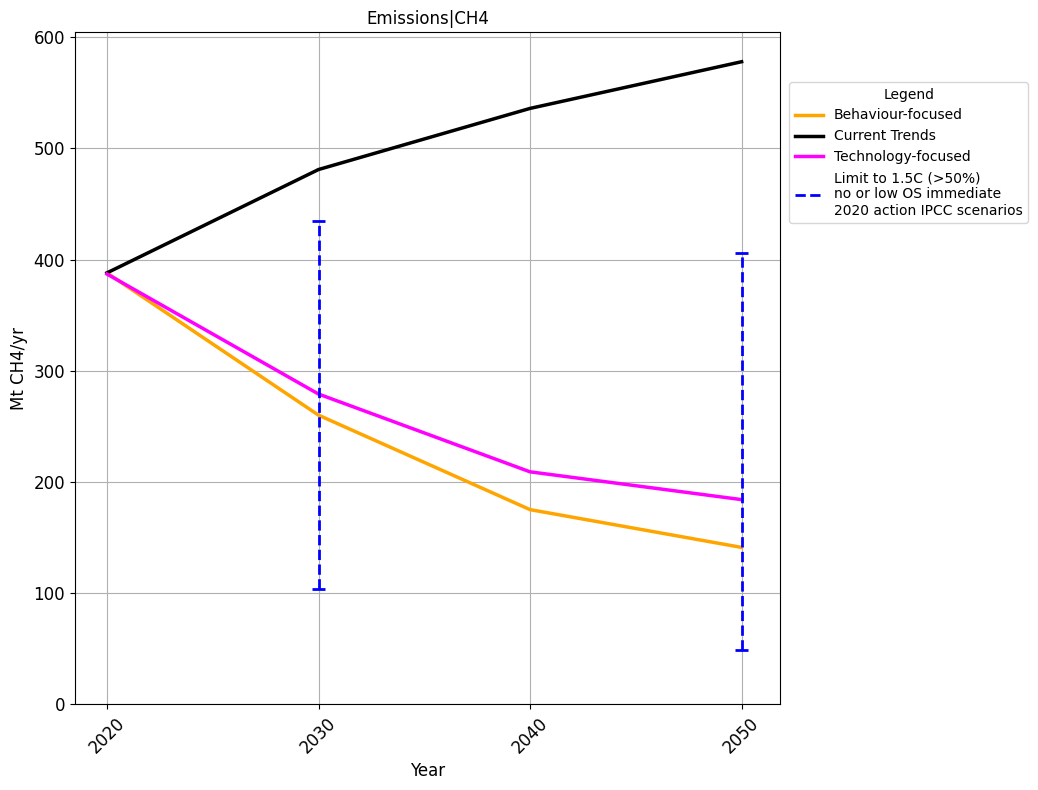

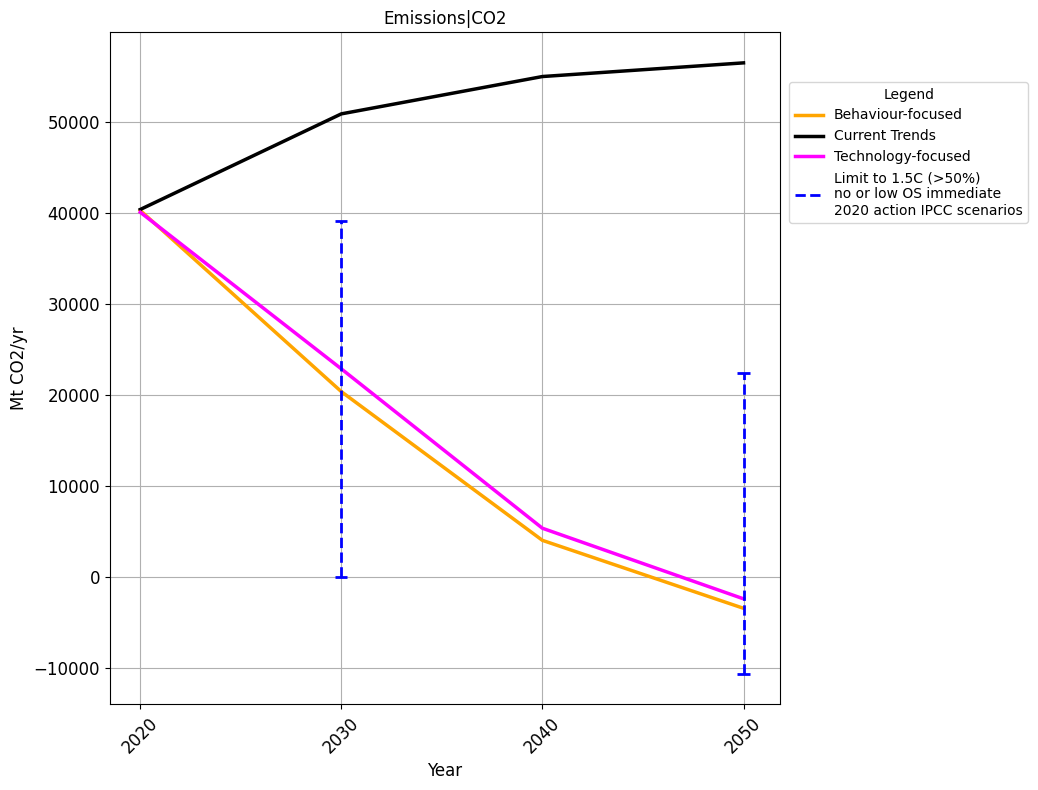

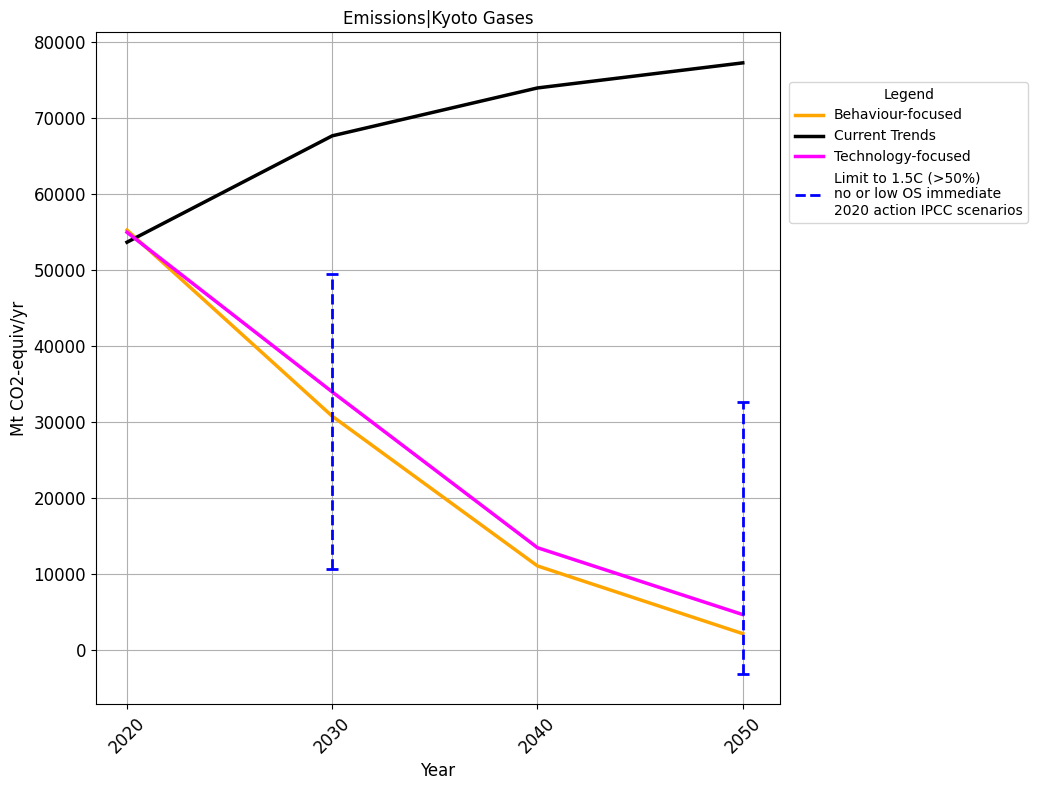

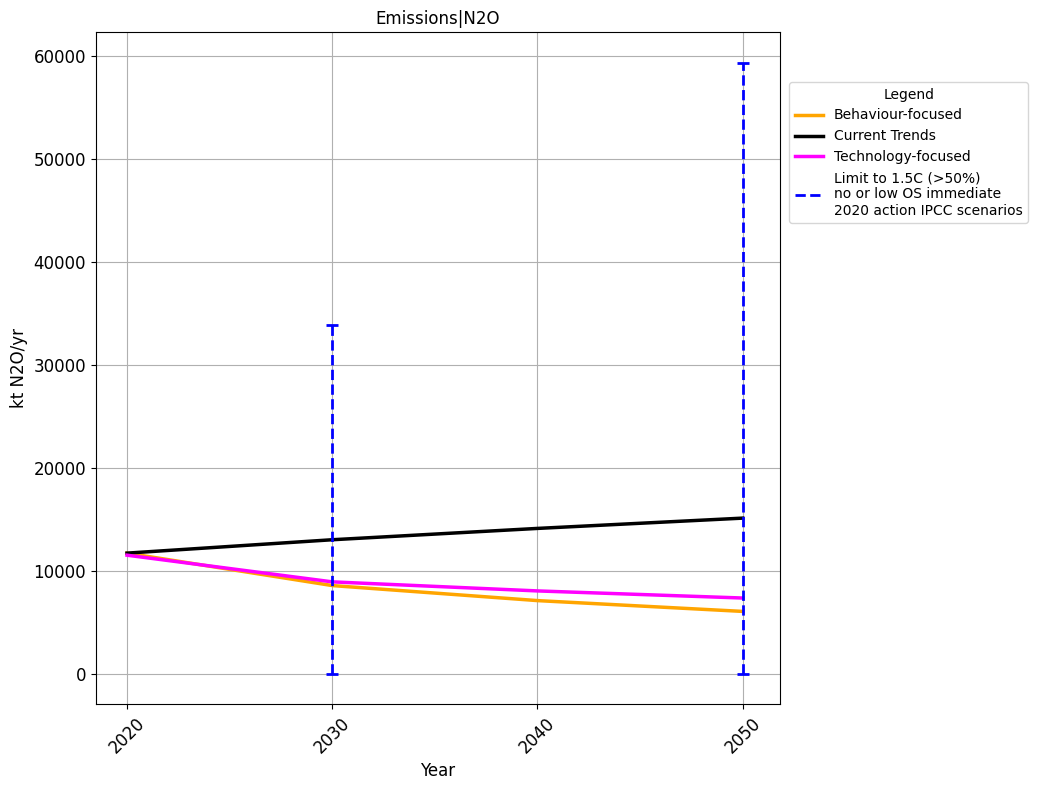

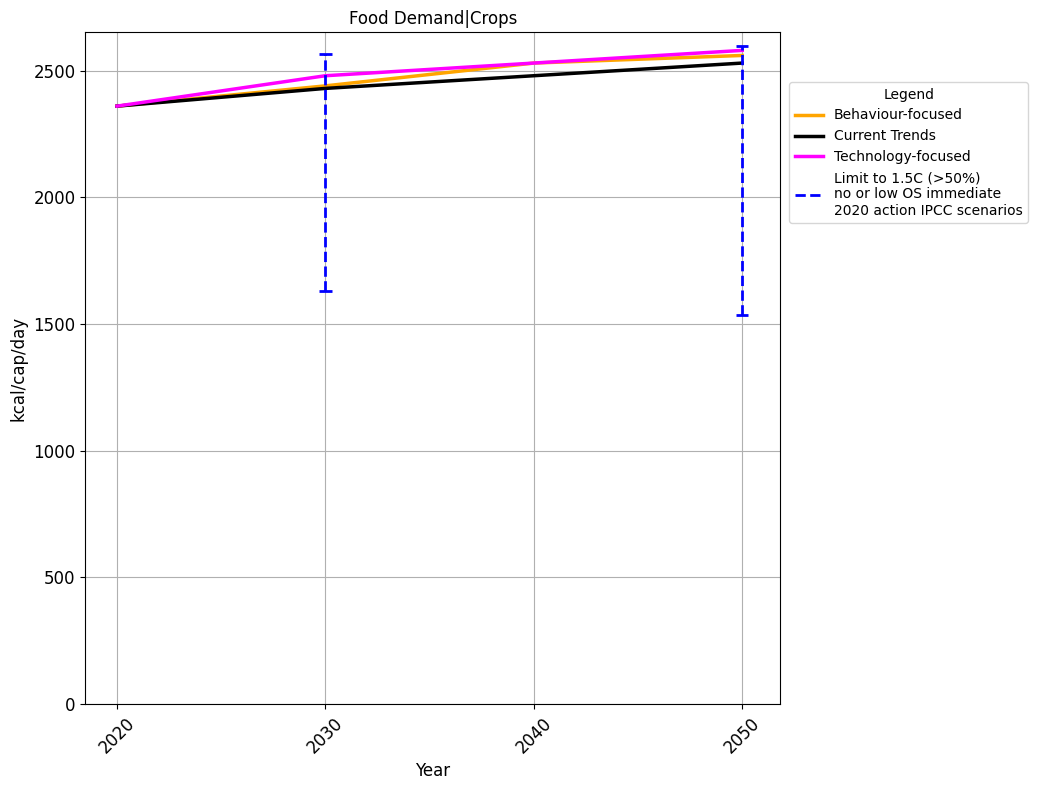

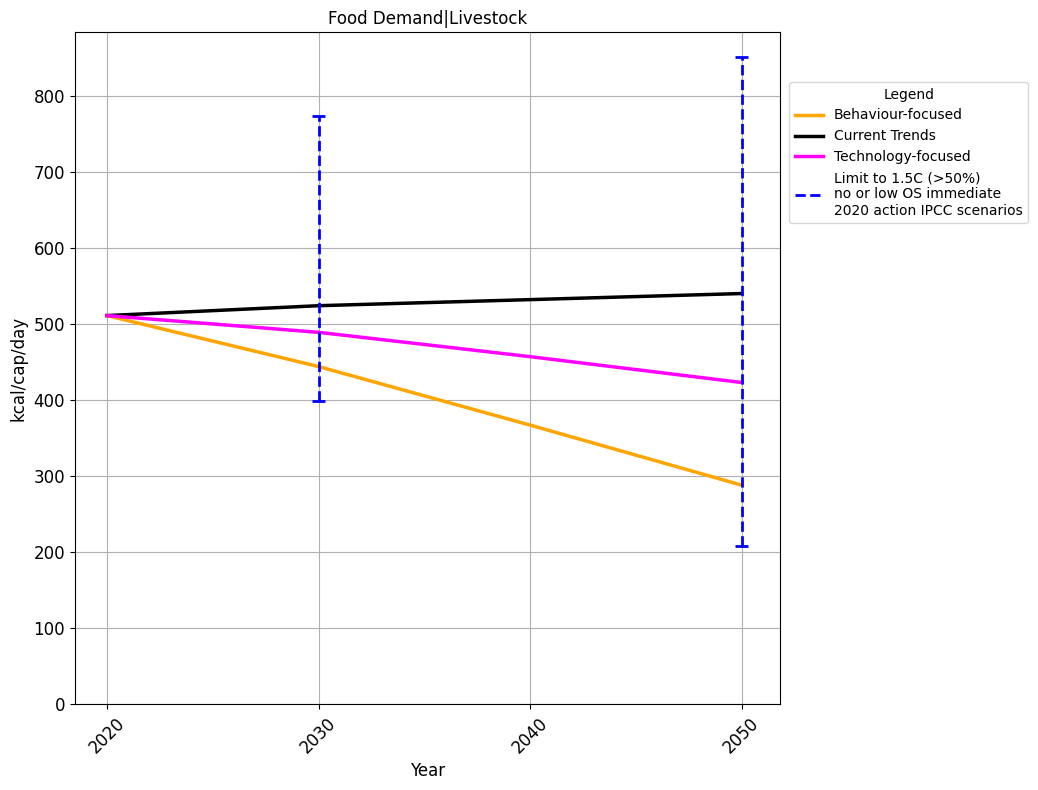

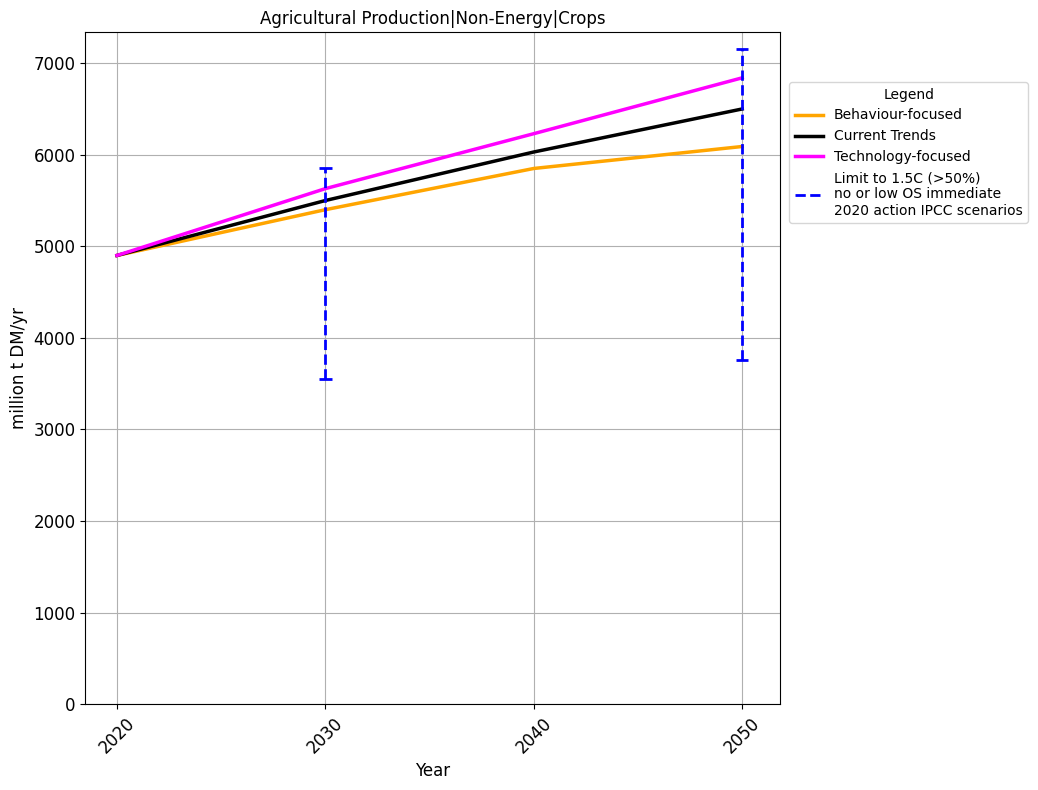

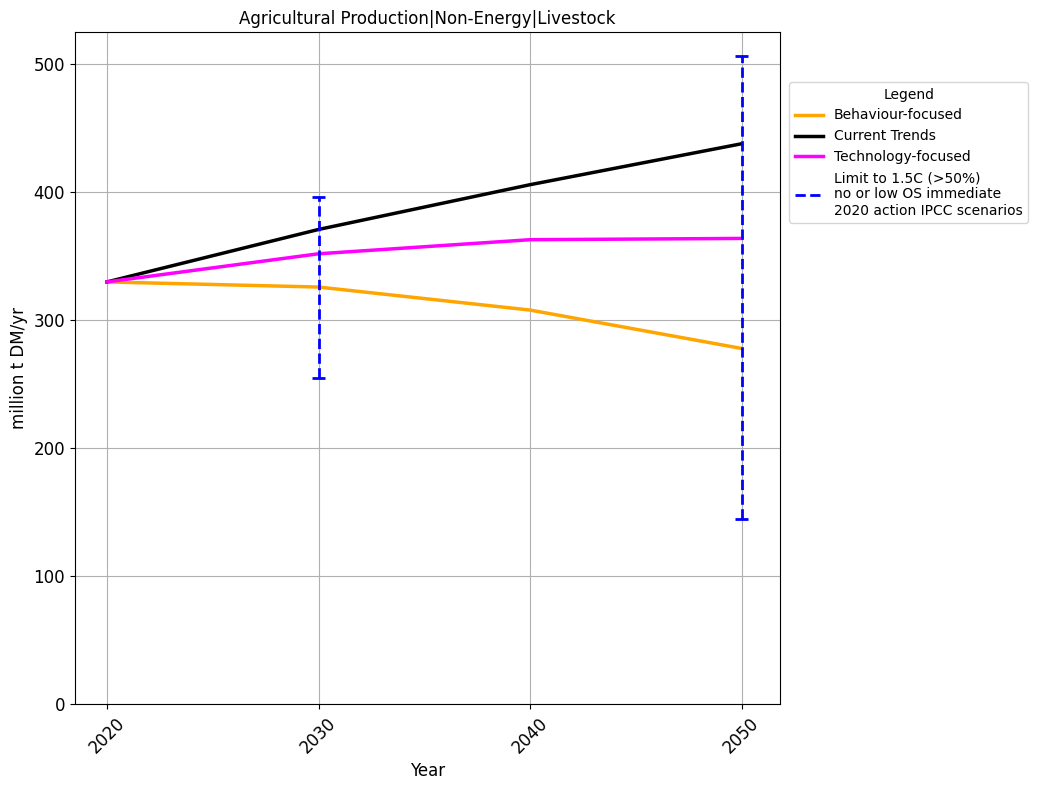

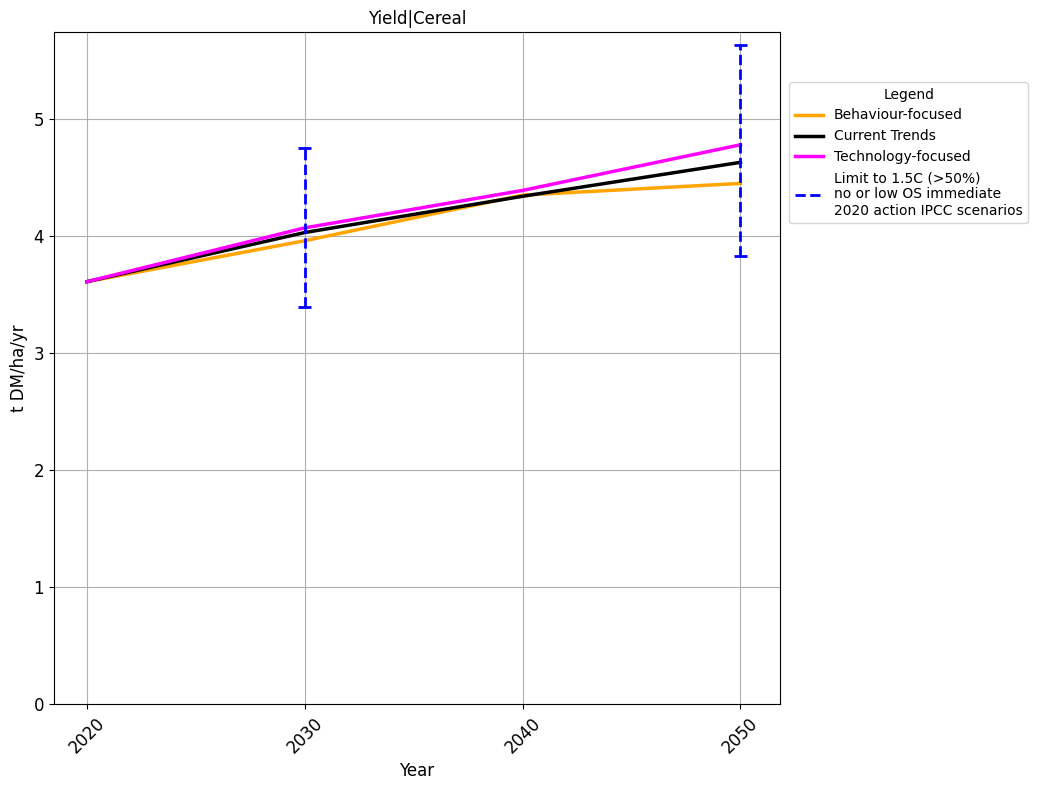

In [9]:
variables = df_marker_data.variable.unique()

# variables = ['Emissions|CO2']
for variable in variables:
    
    # Use Seaborn to create the plot with markers and lines
    marker_data = df_marker_data[df_marker_data["variable"] == variable]
    # all_data = df_all_data[df_all_data["variable"] == variable]
    ar6_data = df_ar6_data[df_ar6_data["variable"] == variable]
    # print(variable, all_data.model.unique())
    # # Define the color palette for scenarios
    scenario_colors = {
        "REF": "black",
        "LIFE-TP": "orange",
        "TECH-TP": "magenta",
        "REF-v2": "black",
        "LIFE-TP-v2": "orange",
        "TECH-TP-v2": "magenta",
        "Current Trends": "black",
        "Behaviour-focused": "orange",
        "Technology-focused": "magenta",
    }

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    sns.lineplot(
        data=marker_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        linewidth=2.5,
        ax=ax
    )
    # If we want plumes from other models
    # sns.lineplot(
    #     data=all_data,
    #     x="year",
    #     y="value",
    #     hue="scenario",
    #     linewidth=0,
    #     ax=ax,
    #     # errorbar='sd',
    #     errorbar=(lambda x: (x.min(), x.max())),
    #     palette=scenario_colors
    # )

    # Calculate min and max across models for each year
    min_values = ar6_data.groupby('year')['value'].min()
    max_values = ar6_data.groupby('year')['value'].max()

    cap_width = 0.3

    for year in min_values.index:
        plt.vlines(x=year, ymin=min_values[year], ymax=max_values[year], color='blue', linestyle='--', lw=2, 
                   label='Limit to 1.5C (>50%) \nno or low OS immediate \n2020 action IPCC scenarios')
        # Caps
        plt.hlines(y=min_values[year], xmin=year - cap_width, xmax=year + cap_width, color='blue', lw=2)
        plt.hlines(y=max_values[year], xmin=year - cap_width, xmax=year + cap_width, color='blue', lw=2)


    ax.legend().set_visible(False)
    # Set labels and title
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(marker_data["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    plt.title(variable)  # Set the title to the variable
    plt.xticks([2020, 2030, 2040, 2050], 
               rotation=45,
               fontsize=12)
    plt.yticks(fontsize=12)

    # Manually add Legend
    handles, labels = ax.get_legend_handles_labels()
    marker_handles = handles[:3]
    marker_labels = labels[:3]
    ipcc_handle = handles[-1]
    ipcc_label = labels[-1]

    ref_patch = mpatches.Patch(color='black', alpha=0.3)
    life_patch = mpatches.Patch(color='orange', alpha=0.3)
    tech_patch = mpatches.Patch(color='magenta', alpha=0.3)

    # range_handles = [ref_patch, life_patch, tech_patch]  
    # range_labels = ['REF Range', 'LIFE Range', 'TECH Range']

    new_handles = marker_handles  + [ipcc_handle] #+ range_handles
    new_labels = marker_labels  + [ipcc_label] #+ range_handles
    fig.legend(new_handles, new_labels, title="Legend", bbox_to_anchor=(1.3, 0.9)) 

    plt.grid(True)
    # Adjust layout to ensure legend fits within the saved image
    plt.tight_layout()
    root_variable = variable.split("|")[0].replace(" ", "_")
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    report_variables =[
        'Emissions|CO2',
        'Emissions|Kyoto Gases',
        'Emissions|N2O',
        'Emissions|CH4',
        'Agricultural Production|Non-Energy|Crops',
        'Agricultural Production|Non-Energy|Livestock',
        'Food Demand|Crops',
        'Food Demand|Livestock',
        'Yield|Cereal'
    ]

    if variable in report_variables:
        plt.savefig(f"../../../plots/TOD/chpt_12/report/{variable_name}.png", bbox_inches="tight")
        plt.savefig(f"../../../plots/TOD/chpt_12/report/{variable_name}.svg", bbox_inches="tight")
    else:
        plt.savefig(f"../../../plots/TOD/chpt_12/diagnostic/{variable_name}.png", bbox_inches="tight")
        plt.close()


# Emissions|CO2|Energy

In [10]:
df_emissions_co2_geo = pd.read_excel(results_path)
df_emissions_co2_geo.rename(columns={'topic':'model'}, inplace=True)
df_emissions_co2_geo = pyam.IamDataFrame(df_aim_image)
df_emissions_co2_geo= df_emissions_co2_geo.filter(variable=['Emissions|CO2|AFOLU','Emissions|CO2|Energy',],
                                region='World')

df_emissions_co2_geo = df_emissions_co2_geo.filter(year=[2020, 2025, 2030, 2035, 2040, 2045, 2050])
df_emissions_co2_geo.multiply('Emissions|CO2|AFOLU', 1, 'Emissions|CO2|Land Use', ignore_units='Mt CO2/yr', append=True)
df_emissions_co2_geo = df_emissions_co2_geo.filter(year=[2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050])
df_emissions_co2_geo.rename(scenario=scenario_rename_dict, inplace=True)
df_emissions_co2_geo.timeseries()

2020  \
model     scenario           region variable               unit                 
Emissions Behaviour-focused  World  Emissions|CO2|AFOLU    Mt CO2/yr   3500.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  34700.0   
                                    Emissions|CO2|Land Use Mt CO2/yr   3500.0   
          Current Trends     World  Emissions|CO2|AFOLU    Mt CO2/yr   3500.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  34800.0   
                                    Emissions|CO2|Land Use Mt CO2/yr   3500.0   
          Technology-focused World  Emissions|CO2|AFOLU    Mt CO2/yr   3500.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  34600.0   
                                    Emissions|CO2|Land Use Mt CO2/yr   3500.0   

                                                                         2030  \
model     scenario           region variable               unit                 
Emissions Behaviour-focused  World  Emissions|CO2|AFOLU    Mt CO2/yr    789.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  17800.0   
                                    Emissions|CO2|Land Use Mt CO2/yr    789.0   
          Current Trends     World  Emissions|CO2|AFOLU    Mt CO2/yr   3560.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  44700.0   
                                    Emissions|CO2|Land Use Mt CO2/yr   3560.0   
          Technology-focused World  Emissions|CO2|AFOLU    Mt CO2/yr    940.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  20600.0   
                                    Emissions|CO2|Land Use Mt CO2/yr    940.0   

                                                                         2040  \
model     scenario           region variable               unit                 
Emissions Behaviour-focused  World  Emissions|CO2|AFOLU    Mt CO2/yr  -2260.0   
                                    Emissions|CO2|Energy   Mt CO2/yr   5370.0   
                                    Emissions|CO2|Land Use Mt CO2/yr  -2260.0   
          Current Trends     World  Emissions|CO2|AFOLU    Mt CO2/yr   2760.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  49100.0   
                                    Emissions|CO2|Land Use Mt CO2/yr   2760.0   
          Technology-focused World  Emissions|CO2|AFOLU    Mt CO2/yr  -2700.0   
                                    Emissions|CO2|Energy   Mt CO2/yr   7210.0   
                                    Emissions|CO2|Land Use Mt CO2/yr  -2700.0   

                                                                         2050  
model     scenario           region variable               unit                
Emissions Behaviour-focused  World  Emissions|CO2|AFOLU    Mt CO2/yr  -4110.0  
                                    Emissions|CO2|Energy   Mt CO2/yr    157.0  
                                    Emissions|CO2|Land Use Mt CO2/yr  -4110.0  
          Current Trends     World  Emissions|CO2|AFOLU    Mt CO2/yr   2080.0  
                                    Emissions|CO2|Energy   Mt CO2/yr  51000.0  
                                    Emissions|CO2|Land Use Mt CO2/yr   2080.0  
          Technology-focused World  Emissions|CO2|AFOLU    Mt CO2/yr  -4200.0  
                                    Emissions|CO2|Energy   Mt CO2/yr   1000.0  
                                    Emissions|CO2|Land Use Mt CO2/yr  -4200.0

In [11]:
df_ar6_co2_emissions_c1 = df_ar6.filter(variable=['Emissions|CO2'])
df_ar6_co2_emissions_c1 = df_ar6_co2_emissions_c1.data

df_ar6_co2_emissions_c78 = pyam.read_iiasa(
    'ar6-public',
    variable=[
            'Emissions|CO2',
            ],
    region='World',
    scenario=list(ar6_c78_scenarios),  
)

df_ar6_co2_emissions_c78 = df_ar6_co2_emissions_c78.filter(year=[2030, 2050])
df_ar6_co2_emissions_c78 = df_ar6_co2_emissions_c78.data

# Get min and max values for uncertainty range ipcc
min_values_c1 = df_ar6_co2_emissions_c1.groupby('year')['value'].min()
max_values_c1 = df_ar6_co2_emissions_c1.groupby('year')['value'].max()

min_values_c78 = df_ar6_co2_emissions_c78.groupby('year')['value'].min()
max_values_c78 = df_ar6_co2_emissions_c78.groupby('year')['value'].max()

[INFO] 13:22:41 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 13:22:41 - pyam.iiasa: You are connected as user `stephenmaycock`


c:\PBLprogs\miniforge3\lib\site-packages\pyam\plotting.py:466: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  pd.concat([_df, _rows.loc[_rows.index.difference(_df.index)]])
c:\PBLprogs\miniforge3\lib\site-packages\pyam\plotting.py:461: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  _rows = pd.concat(
c:\PBLprogs\miniforge3\lib\site-packages\pyam\plotting.py:461: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the ol

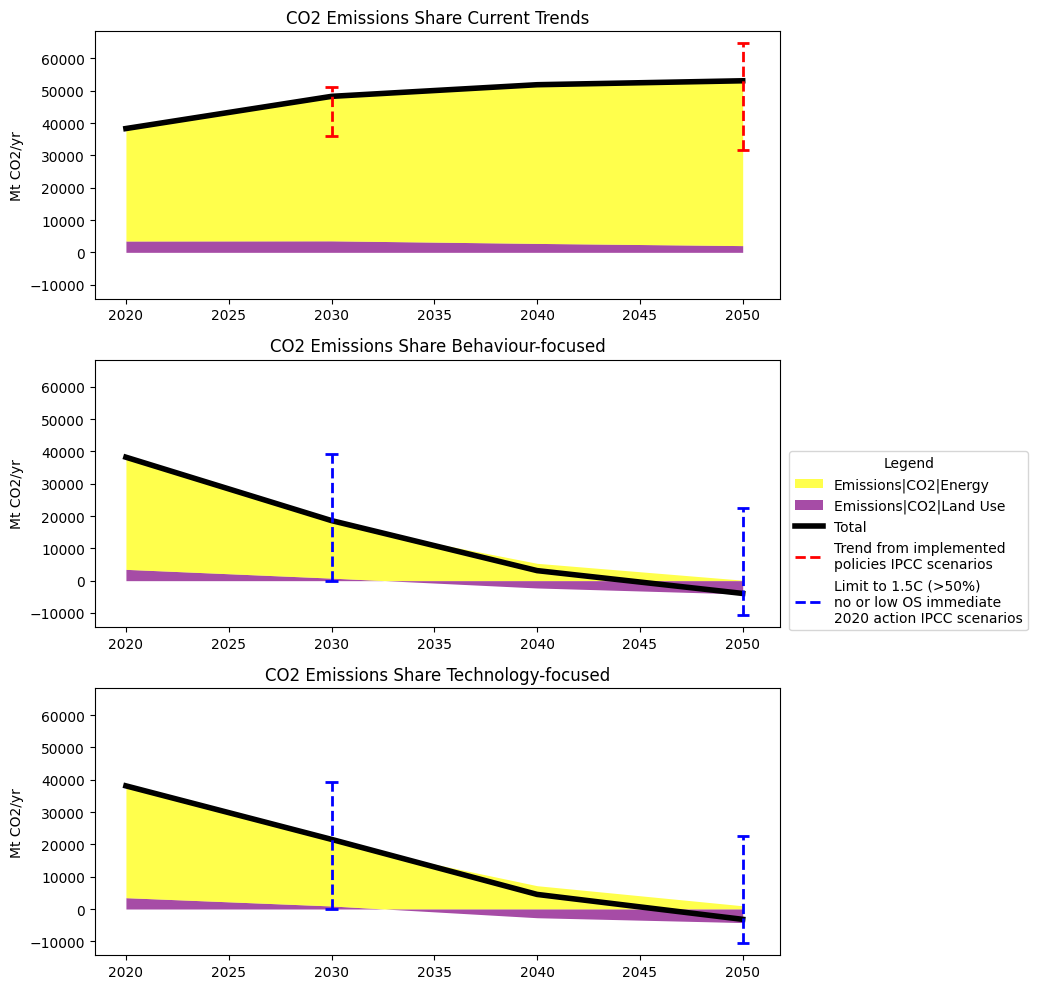

In [12]:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","purple",])

# Plotting
fig, axes = plt.subplots(figsize=(8, 10), nrows=3, sharey=True)

for idx, scenario in enumerate(["Current Trends", "Behaviour-focused", "Technology-focused"]):
    ax = axes[idx]
    data=df_emissions_co2_geo.filter(variable=['Emissions|CO2|Energy', 'Emissions|CO2|Land Use',],
                                     scenario=scenario)
    
    scenario_colors = {
            "Emissions|CO2|AFOLU": "orange",
            "Emissions|CO2|Energy": "magenta",
        }
    
    # For some reason it pyam believes there are multiple models in the filtered df
    pyam.IamDataFrame(data.timeseries()).plot.stack(title=f'CO2 Emissions Share {scenario}',
                    total=True,
                    ax=ax, 
                    alpha=0.7, 
                    cmap=cmap)
    
    # Add uncertainty ranges to total
    # Calculate min and max across models for each year
    if scenario == "Current Trends":
        min_values = min_values_c78
        max_values = max_values_c78
        legend_label = 'Trend from implemented \npolicies IPCC scenarios'
        color='red'
    else:
        min_values = min_values_c1
        max_values = max_values_c1
        legend_label='Limit to 1.5C (>50%) \nno or low OS immediate \n2020 action IPCC scenarios'
        color='blue'

    cap_width = 0.3
    for year in min_values.index:
        # for year in min_values.index:
        ax.vlines(x=year, ymin=min_values[year], ymax=max_values[year], color=color, linestyle='--', lw=2, label=legend_label)
        # Caps
        ax.hlines(y=min_values[year], xmin=year - cap_width, xmax=year + cap_width, color=color, lw=2)
        ax.hlines(y=max_values[year], xmin=year - cap_width, xmax=year + cap_width, color=color, lw=2)

    # ax.set_ylim(-15000, 55000)
    ax.set(xlabel=None)
    ax.legend().set_visible(False)
    # ax.set_xlim(2010, 2050)
    plt.tight_layout()

# Manually add Legend
handles_c78, labels_c78 = axes[0].get_legend_handles_labels()
handles_c78, labels_c78 = handles_c78[:-1], labels_c78[:-1]
handles_c1, labels_c1 = axes[1].get_legend_handles_labels()
handle_c1 = handles_c1[-1]
label_c1 = labels_c1[-1]
new_handles = handles_c78 + [handle_c1]
new_labels = labels_c78 + [label_c1]
fig.legend(new_handles, new_labels, title="Legend", bbox_to_anchor=(1.3, 0.55)) 
plt.savefig(f"../../../plots/TOD/chpt_12/report/CO2_shares_per_scenario.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/chpt_12/report/CO2_shares_per_scenario.svg", bbox_inches="tight")
# plt.close()

# Primary and Final Energy Stacked

In [13]:
df_stacked_geo = pd.read_excel(results_path)
df_stacked_geo.rename(columns={'topic':'model'}, inplace=True)
df_stacked_geo = pyam.IamDataFrame(df_stacked_geo)
df_energy_geo= df_stacked_geo.filter(variable=[
            'Primary Energy|Biomass',
            'Primary Energy|Coal',
            'Primary Energy|Gas',
            'Primary Energy|Nuclear',
            'Primary Energy|Oil',
            'Primary Energy|Non-Biomass Renewables',
            'Secondary Energy|Electricity|Biomass',
            'Secondary Energy|Electricity|Coal',
            'Secondary Energy|Electricity|Gas',
            'Secondary Energy|Electricity|Non-Biomass Renewables',
            'Secondary Energy|Electricity|Nuclear',
            'Secondary Energy|Electricity|Oil',],
    region='World',
    scenario=['TECH-TP', 'LIFE-TP'], 
    year=[2020, 2025, 2030, 2035, 2040, 2045, 2050])

df_energy_geo.rename(scenario=scenario_rename_dict, inplace=True)

df_total_energy = df_stacked_geo.filter(variable=['Primary Energy', 'Secondary Energy|Electricity'],
                                         year=[2020, 2025, 2030, 2035, 2040, 2045, 2050],
                                         scenario='REF',
                                         region='World')
df_total_energy.rename(scenario=scenario_rename_dict, inplace=True)

df_ar6_energy_c1 = pyam.read_iiasa(
    'ar6-public',
    variable=[
            'Primary Energy', 'Secondary Energy|Electricity' 
            ],
    region='World',
    scenario=list(ar6_c1_scenarios),  
)

df_ar6_energy_c1 = df_ar6_energy_c1.filter(year=[2030, 2050])

[INFO] 13:23:09 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 13:23:09 - pyam.iiasa: You are connected as user `stephenmaycock`


In [14]:
df_ar6_energy_c1_data = df_ar6_energy_c1.filter(variable='Secondary Energy|Electricity').data

min_values_c1 = df_ar6_energy_c1_data.groupby('year')['value'].min()
max_values_c1 = df_ar6_energy_c1_data.groupby('year')['value'].max()

print(min_values_c1)
print(max_values_c1)

year
2030     81.276019
2050    117.205496
Name: value, dtype: float64
year
2030    209.378354
2050    354.480600
Name: value, dtype: float64


c:\PBLprogs\miniforge3\lib\site-packages\pyam\plotting.py:466: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  pd.concat([_df, _rows.loc[_rows.index.difference(_df.index)]])
c:\PBLprogs\miniforge3\lib\site-packages\pyam\plotting.py:466: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  pd.concat([_df, _rows.loc[_rows.index.difference(_df.index)]])
c:\PBLprogs\miniforge3\lib\site-packages\pyam\plotting.py:466: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when de

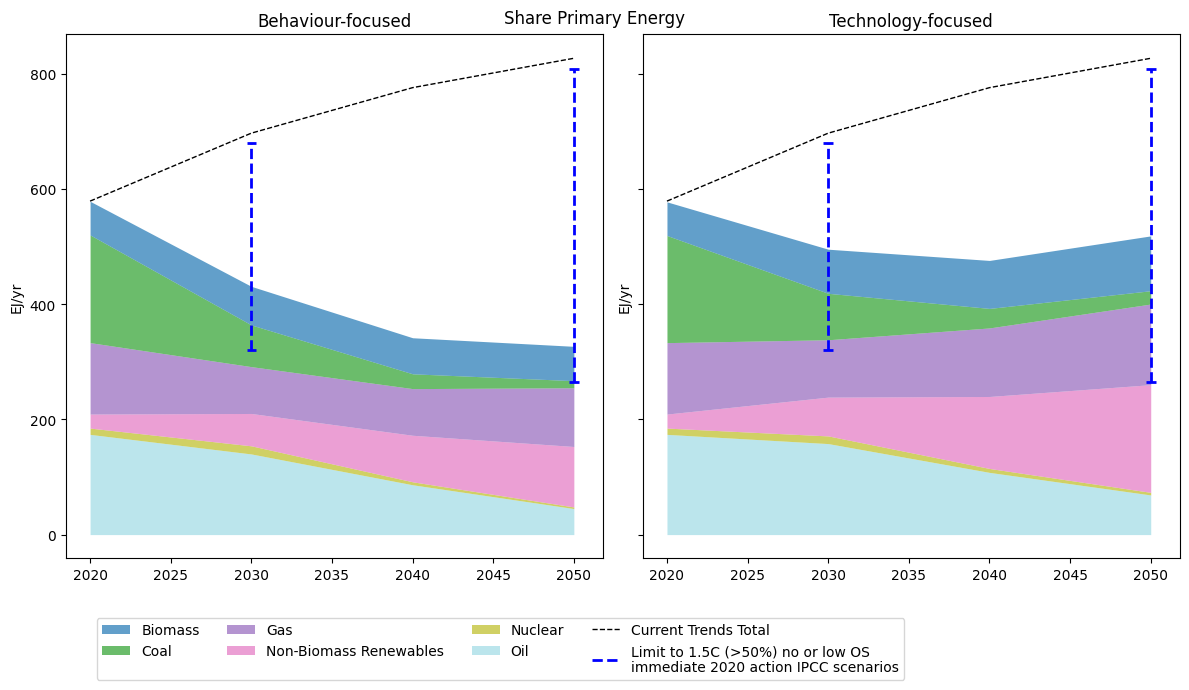

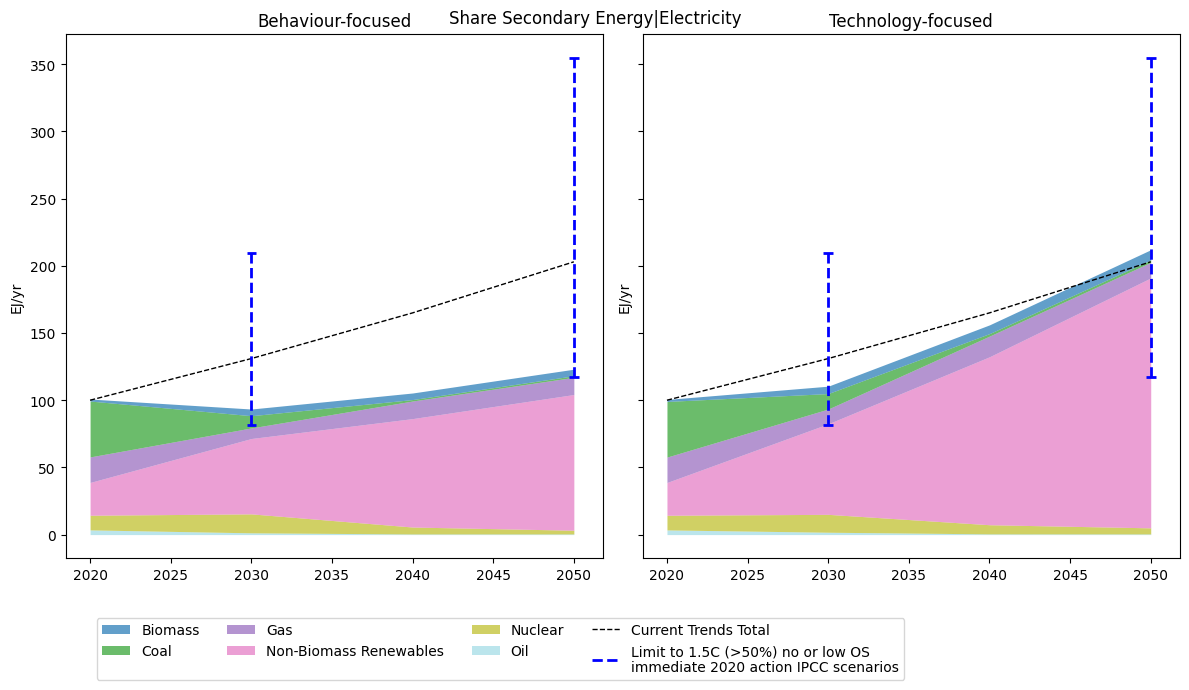

In [15]:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","purple",])

for variable in ['Primary Energy', 'Secondary Energy|Electricity']:
    # Plotting
    fig, axes = plt.subplots(figsize=(12, 6), ncols=2, sharey=True)
    for idx, scenario in enumerate(["Behaviour-focused", "Technology-focused"]):
        ax = axes[idx]
        df_total = df_total_energy.filter(variable=variable).data
        data=df_energy_geo.filter(variable=f'{variable}*', scenario=scenario)

        data.plot.stack(title=f'{scenario}',
                        ax=ax, 
                        alpha=0.7, 
                        cmap="tab20")
        
        sns.lineplot(
            data=df_total,
            x="year",
            y="value",
            linewidth=1,
            ax=ax,
            color='black',
            linestyle='--',
            label='Current Trends Total'
            )
        
        df_ar6_energy_c1_data = df_ar6_energy_c1.filter(variable=variable).data

        min_values_c1 = df_ar6_energy_c1_data.groupby('year')['value'].min()
        max_values_c1 = df_ar6_energy_c1_data.groupby('year')['value'].max()
        legend_label = 'Limit to 1.5C (>50%) no or low OS \nimmediate 2020 action IPCC scenarios'
        color='blue'

        cap_width = 0.3
        for year in min_values.index:
            # for year in min_values.index:
            ax.vlines(x=year, ymin=min_values_c1[year], ymax=max_values_c1[year], color=color, linestyle='--', lw=2, label=legend_label)
            # Caps
            ax.hlines(y=min_values_c1[year], xmin=year - cap_width, xmax=year + cap_width, color=color, lw=2)
            ax.hlines(y=max_values_c1[year], xmin=year - cap_width, xmax=year + cap_width, color=color, lw=2)

        # ax.set_ylim(-15000, 55000)
        ax.set(xlabel=None)
        ax.legend().set_visible(False)
        # ax.set_xlim(2020, 2050)
        # if variable=='Primary Energy':
        #     ax.set_ylim(0, 1000)
        # else:
        #     ax.set_ylim(0, 300)
        plt.tight_layout()

    handles, labels = axes[1].get_legend_handles_labels()
    handles, labels = handles[:-1], labels[:-1]
    labels = [item.split('|')[-1] for item in labels]
    axes[1].legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(0.5, -0.1), ncol=4)
    fig.suptitle(f'Share {variable}')
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    plt.savefig(f"../../../plots/TOD/chpt_12/report/Share_{variable_name}.png", bbox_inches="tight")
    plt.savefig(f"../../../plots/TOD/chpt_12/report/Share_{variable_name}.svg", bbox_inches="tight")

